# Computer Vision

## Lab 1

### Imports
- [x] OpenCV: computer vision library (import cv2)
- [x] NumPy: n-dimensional arrays and math (import numpy as np)
- [x] SciPy: scientific computing and stats (import scipy.stats)
- [x] SciKit-image: image processing and color conversion (import skimage)
- [ ] ImageIO: easy image/video reading/writing (import imageio)
- [x] mpmath: arbitrary precision floating point operations (import mpmath)
- [x] matplotlib: plotting (import matplotlib.pyplot as plt)
- [x] seaborn: matplotlib wrapper (import seaborn as sns)
- [x] Python Image Library: alternative image processing (import PIL)

In [1]:
# Imports
import cv2
import numpy as np
import scipy.stats
import skimage
import mpmath
import matplotlib.pyplot as plt
import seaborn as sns
import PIL


### Define Images

In [2]:
# Images
image_35 = "image-35.jpg"
image_83 = "image-83.jpg"
image_110 = "image-110.jpg"

images = [image_35, image_83, image_110]
num_images = len(images)

# Masks
mask_35 = "mask-35.png"
mask_83 = "mask-83.png"
mask_110 = "mask-110.png"

masks = [mask_35, mask_83, mask_110]
num_masks = len(masks)

# All
all = images + masks


In [3]:
def image_as_grayscale_array(image):
    return np.asarray(skimage.color.rgb2gray(image.convert(mode="RGB")))


def mask_as_location_array(mask):
    return np.asarray(mask.convert(mode="1"))



### Display Images

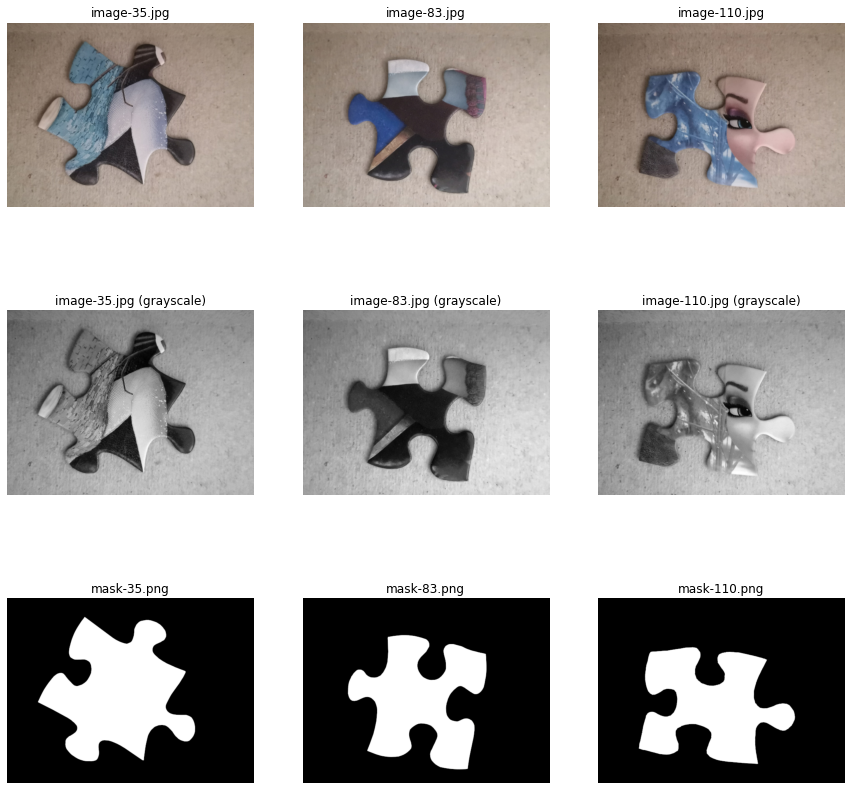

In [4]:
fig = plt.figure(figsize=(num_images * 5, 15))
for image_name, mask_name, i in zip(images, masks, range(num_images)):
    with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
        fig.add_subplot(3, num_images, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
        
        grayscale = skimage.color.rgb2gray(image.convert(mode="RGB"))
        fig.add_subplot(3, num_images, num_images+i+1)
        plt.imshow(grayscale, cmap="gray")
        plt.axis('off')
        plt.title(image_name+" (grayscale)")
        
        fig.add_subplot(3, len(masks), 2*num_images+i+1)
        plt.imshow(mask)
        plt.axis('off')
        plt.title(mask_name)

### Section 4 -  Descriptive Statistics

#### Questions 1, 2 & 3

In [5]:
for name in images:
    with PIL.Image.open(f"./assets/{name}") as image:
        print(name)

        print(f"1. {image.width} (width)")
        print(f"2. {image.height} (height)")
        print(f"3. {image.width * image.height} pixels")
        
        print()


image-35.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-83.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels

image-110.jpg
1. 600 (width)
2. 450 (height)
3. 270000 pixels



#### Questions 4 & 5

In [6]:

for name in masks:
    with PIL.Image.open(f"./assets/{name}") as mask:
        print(name)

        mask_arr = mask_as_location_array(mask)
        unique, counts = np.unique(mask_arr, return_counts=True)

        counts_dict = dict(zip(unique, counts))

        print(f"4. {counts_dict[False]} black pixels")
        print(f"5. {counts_dict[True]} white pixels")
        
        print()

mask-35.png
4. 195470 black pixels
5. 74530 white pixels

mask-83.png
4. 209682 black pixels
5. 60318 white pixels

mask-110.png
4. 209196 black pixels
5. 60804 white pixels



#### Question 6 & 7

In [7]:
for name in images:
    with PIL.Image.open(f"./assets/{name}") as image:
        print(name)
        
        grayscale = image_as_grayscale_array(image)

        print(f"6. {np.amin(grayscale)} (min)")
        print(f"7. {np.amax(grayscale)} (max)")
        
        print()


image-35.jpg
6. 0.08399686274509804 (min)
7. 0.8985443137254902 (max)

image-83.jpg
6. 0.10333686274509803 (min)
7. 0.8971980392156863 (max)

image-110.jpg
6. 0.05205882352941176 (min)
7. 0.8501392156862745 (max)



#### Question 8 & 9

In [8]:
for image_name, mask_name in zip(images, masks):
    with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
        print(image_name)

        image_arr = image_as_grayscale_array(image)
        mask_arr = mask_as_location_array(mask)

        image_puzzle = image_arr[mask_arr == True]
        print(f"8. {np.amin(image_puzzle)} (min) and {np.amax(image_puzzle)} (max)")

        image_bg = image_arr[mask_arr == False]
        print(f"9. {np.amin(image_bg)} (min) and {np.amax(image_bg)} (max)")

        print()


image-35.jpg
8. 0.08399686274509804 (min) and 0.8985443137254902 (max)
9. 0.14756823529411764 (min) and 0.7937560784313724 (max)

image-83.jpg
8. 0.10333686274509803 (min) and 0.8971980392156863 (max)
9. 0.18647843137254905 (min) and 0.8673949019607844 (max)

image-110.jpg
8. 0.05205882352941176 (min) and 0.8501392156862745 (max)
9. 0.11280980392156864 (min) and 0.7903247058823529 (max)



#### Question 10

In [9]:
for name in images:
    with PIL.Image.open(f"./assets/{name}") as image:
        print(name)

        image_arr = image_as_grayscale_array(image)
        print(f"10. {np.mean(image_arr)} (mean)")

        print()


image-35.jpg
10. 0.5384709828395062 (mean)

image-83.jpg
10. 0.5664833728249818 (mean)

image-110.jpg
10. 0.5367658629745824 (mean)



#### Question 11 & 12

In [10]:
for image_name, mask_name in zip(images, masks):
    with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
        print(image_name)
        image_arr = image_as_grayscale_array(image)
        mask_arr = mask_as_location_array(mask)

        image_puzzle = image_arr[mask_arr == True]
        print(f"11. {np.mean(image_puzzle)} (mean | puzzle)")

        image_bg = image_arr[mask_arr == False]
        print(f"12. {np.mean(image_bg)} (mean | background)")

        print()


image-35.jpg
11. 0.44184835546154594 (mean | puzzle)
12. 0.5753118505863695 (mean | background)

image-83.jpg
11. 0.3251410136342743 (mean | puzzle)
12. 0.635908924000882 (mean | background)

image-110.jpg
11. 0.462364174467366 (mean | puzzle)
12. 0.5583911343372892 (mean | background)



#### Question 13 & 14

In [11]:
for image_name, mask_name in zip(images, masks):
    with PIL.Image.open(f"./assets/{image_name}") as image, PIL.Image.open(f"./assets/{mask_name}") as mask:
        print(image_name)
        image_arr = image_as_grayscale_array(image)
        mask_arr = mask_as_location_array(mask)

        image_puzzle = image_arr[mask_arr == True]
        print(f"13. {np.var(image_puzzle)} (variance | puzzle)")

        image_bg = image_arr[mask_arr == False]
        print(f"14. {np.var(image_bg)} (variance | background)")

        print()

image-35.jpg
13. 0.03806606384291545 (variance | puzzle)
14. 0.00784590844729906 (variance | background)

image-83.jpg
13. 0.02979163158696951 (variance | puzzle)
14. 0.010540964523995569 (variance | background)

image-110.jpg
13. 0.027336018392854017 (variance | puzzle)
14. 0.008967652488759194 (variance | background)



#### Question 15, 16 & 17

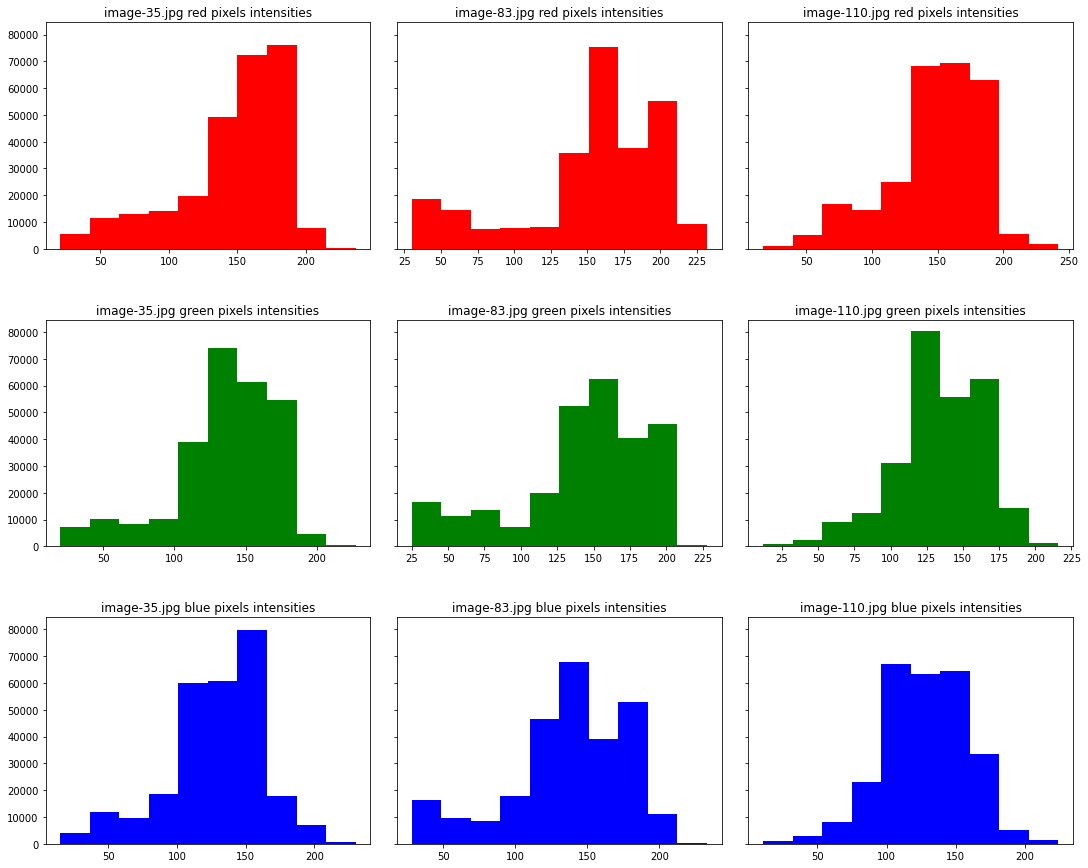

In [25]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

for image_name, i in zip(images, range(num_images)):
    with PIL.Image.open(f"./assets/{image_name}") as image:
        image_arr = np.asarray(image)
        
        red_pixels = image_arr[:,:,0].flatten()
        axes[0, i].hist(red_pixels, facecolor="r")
        axes[0, i].set_title(image_name+" red pixels intensities")
        
        green_pixels = image_arr[:,:,1].flatten()
        axes[1, i].hist(green_pixels, facecolor="g")
        axes[1, i].set_title(image_name+" green pixels intensities")
        
        blue_pixels = image_arr[:,:,2].flatten()
        axes[2, i].hist(blue_pixels, facecolor="b")
        axes[2, i].set_title(image_name+" blue pixels intensities")

### Question 18

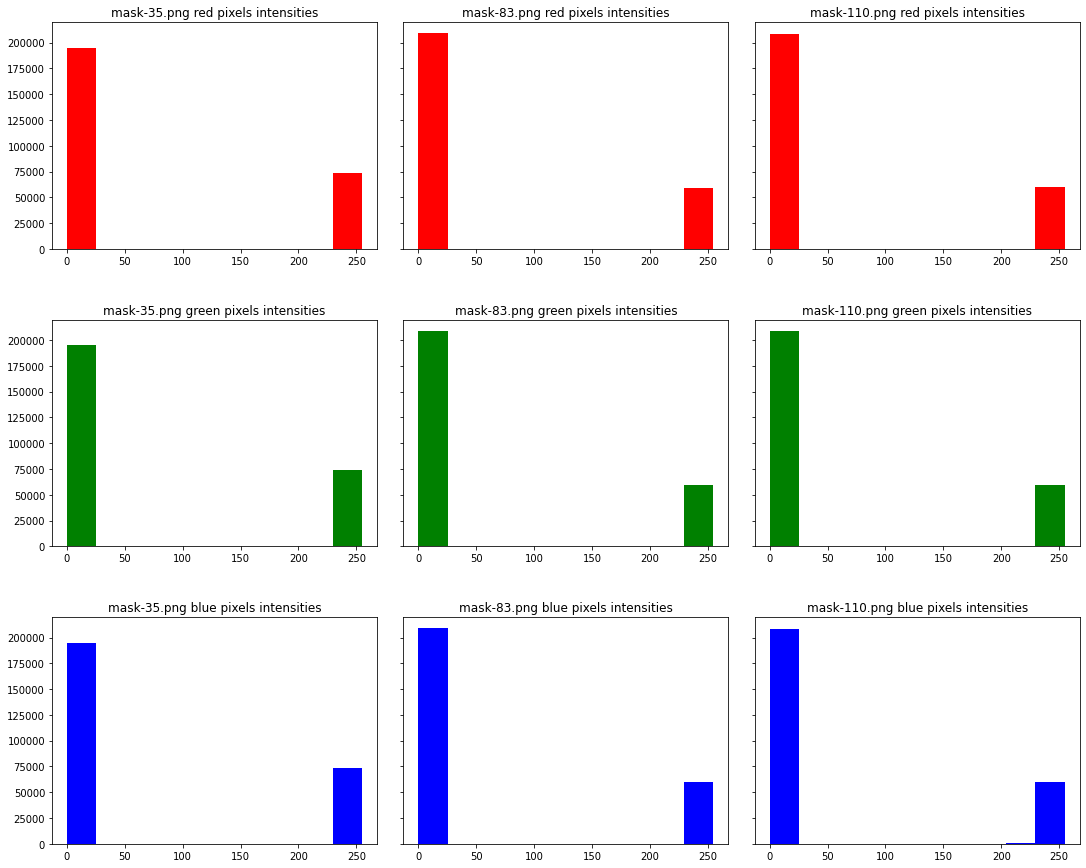

In [26]:
fig, axes = plt.subplots(3, num_masks, sharey=True)

fig.set_figwidth(5 * num_masks)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

for mask_name, i in zip(masks, range(num_masks)):
    with PIL.Image.open(f"./assets/{mask_name}") as mask:
        mask_arr = np.asarray(mask)
        
        red_pixels = mask_arr[:,:,0].flatten()
        axes[0, i].hist(red_pixels, facecolor="r")
        axes[0, i].set_title(mask_name+" red pixels intensities")
        
        green_pixels = mask_arr[:,:,1].flatten()
        axes[1, i].hist(green_pixels, facecolor="g")
        axes[1, i].set_title(mask_name+" green pixels intensities")
        
        blue_pixels = mask_arr[:,:,2].flatten()
        axes[2, i].hist(blue_pixels, facecolor="b")
        axes[2, i].set_title(mask_name+" blue pixels intensities")

### Question 19, 20 & 21

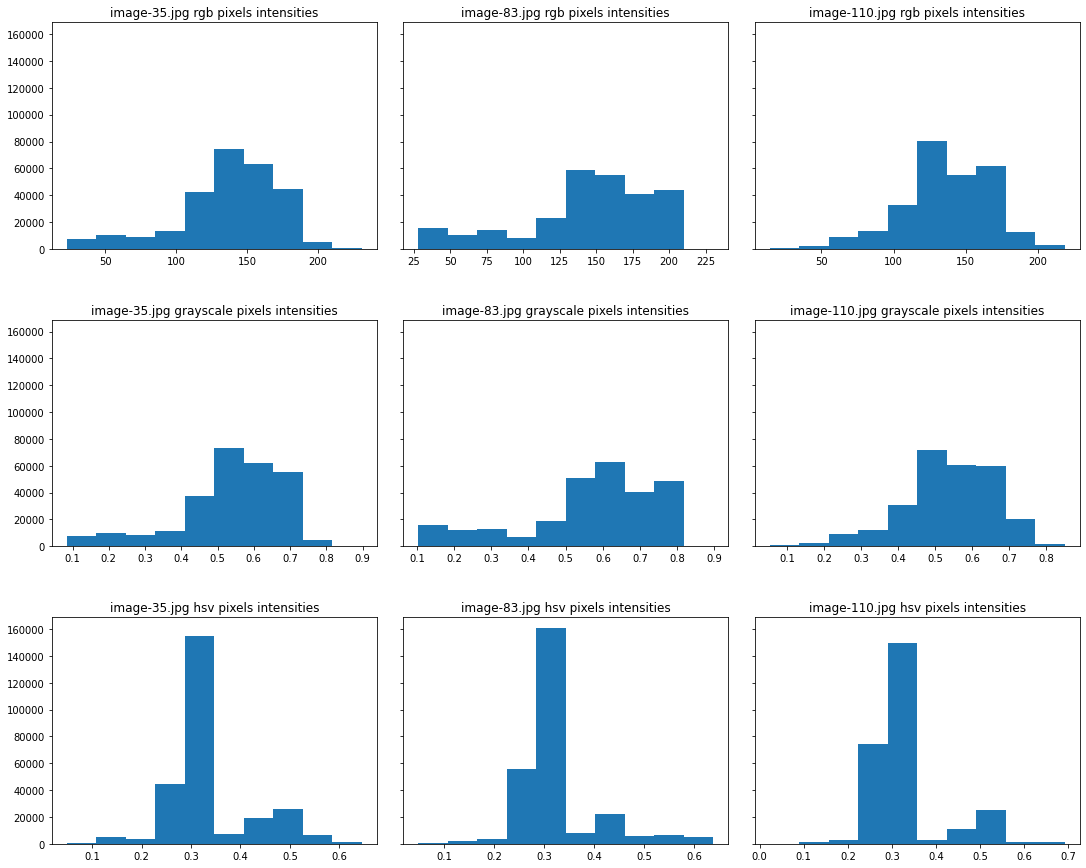

In [45]:
fig, axes = plt.subplots(3, num_images, sharey=True)

fig.set_figwidth(5 * num_images)
fig.set_figheight(12)
fig.tight_layout(h_pad=5)

for image_name, i in zip(images, range(num_images)):
    with PIL.Image.open(f"./assets/{image_name}") as image:
        image_arr = np.asarray(image)
        
        image_intensities = np.mean(image_arr, 2).flatten()
        axes[0, i].hist(image_intensities)
        axes[0, i].set_title(image_name+" rgb pixels intensities")
        
        grayscale = skimage.color.rgb2gray(image_arr)
        
        grayscale_arr = np.asarray(grayscale).flatten()
        axes[1, i].hist(grayscale_arr)
        axes[1, i].set_title(image_name+" grayscale pixels intensities")
        
        hsv = skimage.color.rgb2hsv(image_arr)
        hsv_arr = np.mean(hsv, 2).flatten()
        axes[2, i].hist(hsv_arr)
        axes[2, i].set_title(image_name+" hsv pixels intensities")